<a href="https://colab.research.google.com/github/ikfinakmlya/klasifikasi_TBC1/blob/main/TBC_banyak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import label_binarize
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_train = '/content/drive/MyDrive/TBCC/train'
path_val = '/content/drive/MyDrive/TBCC/val'
path_test = '/content/drive/MyDrive/TBCC/test'

class_labels = os.listdir(path_train)
total_class = len(class_labels)


In [ ]:
label_count_train = {}
label_count_val = {}
train_size=test_size=val_size=0

for clss in class_labels:
    clss_size_train = len(os.listdir(os.path.join(path_train,clss)))
    train_size += clss_size_train
    label_count_train[clss] = clss_size_train

    clss_size_val = len(os.listdir(os.path.join(path_val,clss)))
    val_size += clss_size_val
    label_count_val[clss] = clss_size_val

    test_size += len(os.listdir(os.path.join(path_test,clss)))


Text(0.5, 1.0, 'Test, Val & Train distribution')

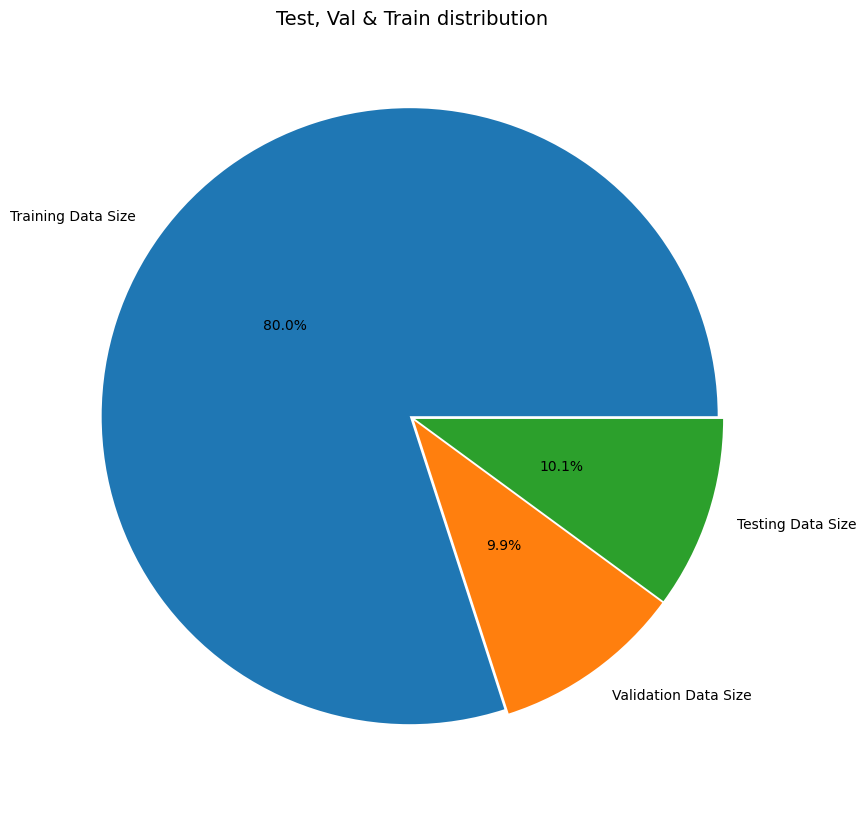

In [ ]:
plt.figure(figsize=(15,10))
plt.pie(x=np.array([train_size, val_size, test_size]),
       autopct="%.1f%%",
       explode=[0.01,0.01,0.01],
       labels=['Training Data Size','Validation Data Size','Testing Data Size'],
       pctdistance=0.5)
plt.title('Test, Val & Train distribution', fontsize=14)

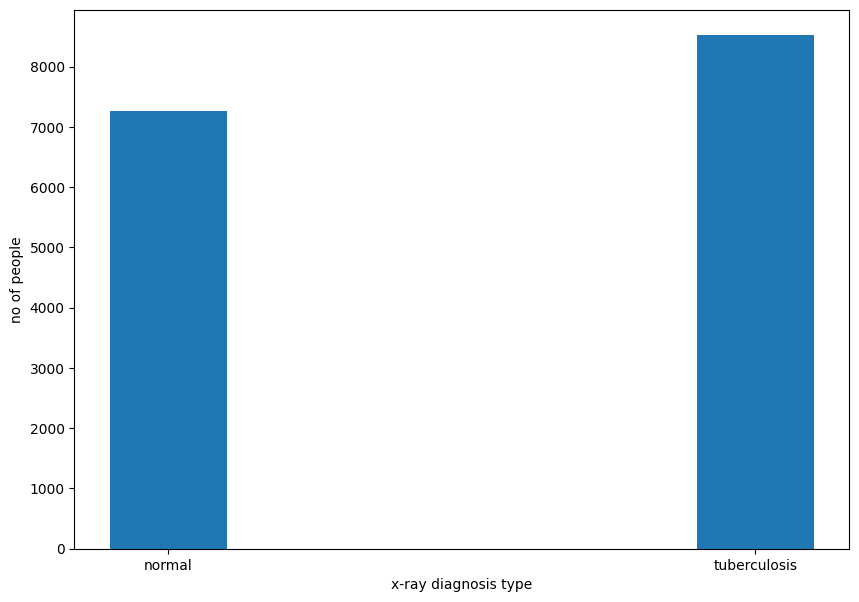

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(list(label_count_train.keys()),
       list(label_count_train.values()),
       width=0.2,
       align="center")

plt.xlabel("x-ray diagnosis type")
plt.ylabel("no of people")
plt.show()

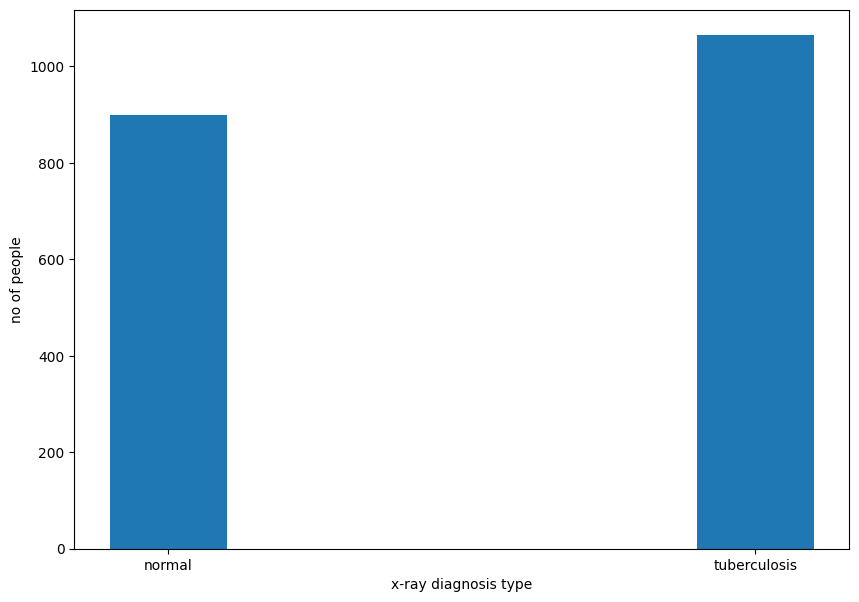

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(list(label_count_val.keys()),
       list(label_count_val.values()),
       width=0.2,
       align="center")

plt.xlabel("x-ray diagnosis type")
plt.ylabel("no of people")
plt.show()

In [ ]:
img_shape = (64, 64)
batch = 64
input_shape=(64,64,3)

train_set= image_dataset_from_directory(
    path_train,
    label_mode="categorical",
    batch_size=batch,
    image_size=img_shape,
    shuffle=True,
)

val_set=image_dataset_from_directory(
    path_val,
    label_mode="categorical",
    batch_size=batch,
    image_size=img_shape,
    shuffle=True,
)

test_set=image_dataset_from_directory(
    path_test,
    label_mode="categorical",
    class_names=None,
    batch_size=batch,
    image_size=img_shape,
    shuffle=False
)

Found 15786 files belonging to 2 classes.
Found 1964 files belonging to 2 classes.
Found 1989 files belonging to 2 classes.


In [ ]:
def transfer_learning():
    base_model=DenseNet121(include_top=False,input_shape=input_shape, weights="imagenet")

    return base_model


def create_model():
    model=Sequential()

    base_model=transfer_learning()
    model.add(base_model)

    model.add(GlobalAveragePooling2D())

    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.2))

    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.2))

    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.01))

    model.add(Dense(total_class,activation="softmax",name="classification"))

    model.summary()

    return model

In [ ]:
model=create_model()

model.compile(optimizer="adam",
                loss='categorical_crossentropy',
                metrics = [tf.keras.metrics.AUC()])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 2, 2, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,958,850 (30.36 MB)

 Trainable params: 7,875,202 (30.04 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
history = model.fit(x = train_set,validation_data=val_set,epochs = 1)

247/247 ━━━━━━━━━━━━━━━━━━━━ 1640s 6s/step - auc: 0.8089 - loss: 0.5320 - val_auc: 0.5150 - val_loss: 5.8496


In [ ]:
model.save("model_tbc.keras")

In [ ]:
y_true =  np.array([])

for x, y in test_set:
  y_true = np.concatenate([y_true, np.argmax(y.numpy(), axis=-1)])

In [ ]:
y_pred=model.predict(test_set)
print(f"Shape of y_pred: {y_pred.shape}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 987ms/step
Shape of y_pred: (1989, 2)


In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    # Ubah y_test jadi one-hot sesuai jumlah kolom di y_pred
    y_test = label_binarize(y_test, classes=range(y_pred.shape[1]))

    for (idx, c_label) in enumerate(class_labels):
        fpr, tpr, thresholds = roc_curve(y_test[:, idx], y_pred[:, idx])
        c_ax.plot(fpr, tpr, lw=2, label='%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))

    # garis random guessing
    c_ax.plot([0, 1], [0, 1], 'black', linestyle='dashed', lw=2, label='Random Guessing')

    return roc_auc_score(y_test, y_pred, average=average)

NameError: name 'multiclass_roc_auc_score' is not defined

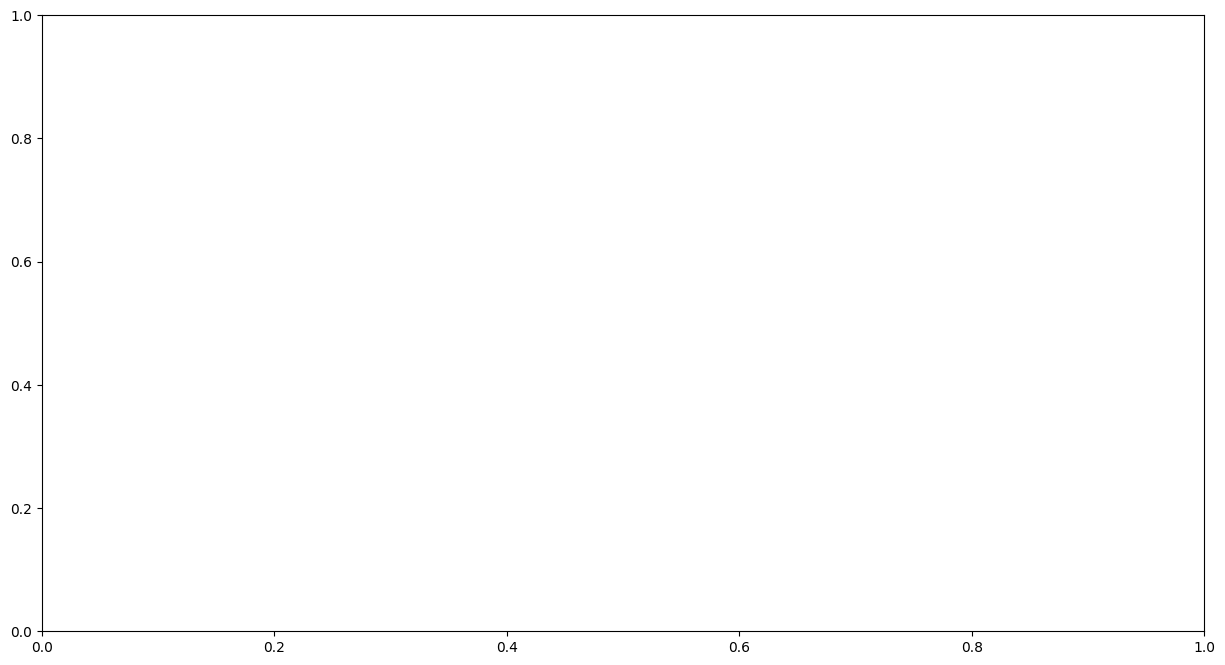

In [3]:
import matplotlib.pyplot as plt
fig, c_ax = plt.subplots(1,1, figsize=(15,8))
print('ROC AUC score:', multiclass_roc_auc_score(y_true, y_pred, average="micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize=11.5)
plt.show()

In [ ]:
print("y_true unique:", np.unique(y_true))
print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)


y_true unique: [0. 1.]
y_true shape: (1989,)
y_pred shape: (1989, 2)
